# Water Potability & pH Values Prediction💦

### <u>Problem Statement</u>
Water is used to carry out activities such as dehydration, cleaning and food production. Well-mainteained water resources can boost countries’ economic growth and can reduce poverty rate. In contrast, contaminated water are often associated with the transmission of diseases such as cholera, diarrhoea, and hepatitis A. Lack of clean water resources could put both the patients and health care workers at additional risk of being infected by viruses.

### <u>Main Objectives</u>
* Predict if each water sample is potable or not potable. (Binary Classification)
* Predict the pH values of each water sample, which can be acidic, normal pH level for surface water system, or alkaline. (Multiclass Classification)

<img src="https://images.pexels.com/photos/327090/pexels-photo-327090.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" alt="Close-up of Bottle Pouring Water on Glass"> 

### <u>Dataset Descriptions</u> 
1. ph: pH of 1. water (0 to 14).
2. Hardness: Capacity of water to precipitate soap in mg/L.
3. Solids: Total dissolved solids in ppm.
4. Chloramines: Amount of Chloramines in ppm.
5. Sulfate: Amount of Sulfates dissolved in mg/L.
6. Conductivity: Electrical conductivity of water in μS/cm.
7. Organic_carbon: Amount of organic carbon in ppm.
8. Trihalomethanes: Amount of Trihalomethanes in μg/L.
9. Turbidity: Measure of light emiting property of water in NTU.
10. Potability: Indicates if water is safe for human consumption. Potable = 1 and Not potable = 0

🌟The dataset is provided by <a href="https://www.kaggle.com/datasets/adityakadiwal/water-potability">Aditya Kadiwal on Kaggle</a>. 

## Import Libraries & Load Data

In [1]:
#ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
from IPython.display import display, HTML

import scipy 
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.weightstats import ztest
from scipy import interp
from scipy.stats import chi2_contingency

from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
# !pip install Boruta
from boruta import BorutaPy
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier as DT 
from sklearn.ensemble import RandomForestClassifier as RF 
from sklearn.ensemble import ExtraTreesClassifier as ET
from sklearn.ensemble import AdaBoostClassifier as AB
from xgboost import XGBClassifier 
from sklearn.naive_bayes import GaussianNB as GNB  
from sklearn.svm import SVC 
from sklearn.ensemble import VotingClassifier 
from sklearn.ensemble import StackingClassifier
import joblib # save model
import shap
shap.initjs() # load JS visualization code to notebook.

In [2]:
wq_df = pd.read_csv(r"C:\Users\NG POOI LING\Desktop\Data Science\0. PROJECTS\3. Water Quality\water_potability.csv") 

## Understanding Dataset Features

In [3]:
wq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
wq_df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [5]:
wq_df.columns = wq_df.columns.str.lower()
wq_df.columns

Index(['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity',
       'organic_carbon', 'trihalomethanes', 'turbidity', 'potability'],
      dtype='object')

We will now process the datasets and add one additional variable (pH_category) that we would want to predict in future sections. pH_category is a qualitative measure of the pH value of the water sample based on the pH values. The rules used for mapping pH values to pH_category are described as follows.
* pH values less than 6.5 are mapped to acidic level under the pH_category attribute.
* pH values between 6.5 and 8.5 are mapped to normal pH_surface water under the pH_category attribute.
* pH values more than 8.5 are mapped to alkaline level under the pH_category attribute.

In [6]:
wq_df['ph_category'] = wq_df['ph'].apply(lambda value: 'acidic level' if value < 6.5 else 'alkaline level' if value > 8.5 else 'normal pH_surface water')
wq_df['ph_category'] = pd.Categorical(wq_df['ph_category'], 
                                      categories=['acidic level', 'alkaline level', 'normal pH_surface water'])

In [7]:
wq_df.sample(5)

ph    hardness        solids  chloramines     sulfate  \
1526  7.511817  174.614134  15736.893959     8.034284         NaN   
244   6.321259  207.257710   8532.139517     5.987877  286.489280   
202   8.369154  183.500378  12975.900334     6.600853  315.901122   
1514  6.019940  140.867898  20666.410142     6.903525         NaN   
2051       NaN  184.741394  32328.714812     8.396587  292.938221   

      conductivity  organic_carbon  trihalomethanes  turbidity  potability  \
1526    303.108146       17.425460        90.662337   2.285520           1   
244     491.765313       10.546886        74.502808   4.501457           0   
202     493.465440       12.987106        87.029410   3.629749           0   
1514    428.695331        8.398237        67.290956   2.747027           1   
2051    617.144794        8.348506        51.457074   5.493181           0   

                  ph_category  
1526  normal pH_surface water  
244              acidic level  
202   normal pH_surface water  
1514             acidic level  
2051  normal pH_surface water

In [8]:
wq_df.isnull().sum()

ph                 491
hardness             0
solids               0
chloramines          0
sulfate            781
conductivity         0
organic_carbon       0
trihalomethanes    162
turbidity            0
potability           0
ph_category          0
dtype: int64

We can see null values in the preview of the dataset, so before we go ahead, let’s remove all the rows that contain null values.

In [9]:
wq_df = wq_df.dropna();

In [10]:
wq_df.shape

(2011, 11)

## Descriptive Statistics

In [11]:
not_safe = round(wq_df.iloc[:,:-2][wq_df['potability']==0].describe(),2)
safe = round(wq_df.iloc[:,:-2][wq_df['potability']==1].describe(),2)
pd.concat([safe,not_safe],
          axis=1,
          keys=['Potable','Not Potable'])

Potable                                                      \
           ph hardness    solids chloramines sulfate conductivity   
count  811.00   811.00    811.00      811.00  811.00       811.00   
mean     7.11   195.91  22344.92        7.17  332.46       425.01   
std      1.44    35.30   8891.55        1.73   47.45        81.95   
min      0.23    73.49   1198.94        1.39  129.00       201.62   
25%      6.26   174.38  15816.08        6.11  301.77       360.28   
50%      7.05   197.62  21217.16        7.21  331.09       421.10   
75%      7.96   218.41  27696.13        8.18  365.63       482.30   
max     11.90   317.34  56488.67       13.13  481.03       695.37   

                                               Not Potable                     \
      organic_carbon trihalomethanes turbidity          ph hardness    solids   
count         811.00          811.00    811.00     1200.00  1200.00   1200.00   
mean           14.29           66.58      3.99        7.07   196.01  21628.54   
std             3.26           16.30      0.78        1.66    30.72   8461.11   
min             2.20            8.58      1.49        1.43    98.45    320.94   
25%            12.15           55.75      3.44        5.98   177.31  15378.91   
50%            14.25           66.61      4.01        6.99   196.80  20507.40   
75%            16.56           77.37      4.53        8.14   214.53  26786.55   
max            23.60          124.00      6.49       14.00   300.29  55334.70   

                                                                        \
      chloramines  sulfate conductivity organic_carbon trihalomethanes   
count     1200.00  1200.00      1200.00        1200.00         1200.00   
mean         7.11   333.74       427.55          14.40           66.28   
std          1.48    36.40        79.88           3.37           15.93   
min          2.46   203.44       210.32           4.37           14.34   
25%          6.17   310.65       369.58          12.12           56.15   
50%          7.10   332.62       424.48          14.35           66.21   
75%          8.08   356.43       482.33          16.79           77.14   
max         12.65   460.11       753.34          27.01          120.03   

                 
      turbidity  
count   1200.00  
mean       3.96  
std        0.78  
min        1.45  
25%        3.44  
50%        3.94  
75%        4.50  
max        6.49

In [12]:
ph_acidic = round(wq_df.iloc[:,1:-2][wq_df['ph_category']=='acidic level'].describe(),2)
ph_permissable = round(wq_df.iloc[:,1:-2][wq_df['ph_category']=='normal pH_surface water'].describe(),2)
ph_alkaline = round(wq_df.iloc[:,1:-2][wq_df['ph_category']=='alkaline level'].describe(),2)
df_ph_cat = pd.concat([ph_acidic,ph_permissable,ph_alkaline],axis=1,keys=['Acidic Level','Normal pH_surface water','Alkaline Level'])
with pd.option_context('display.max_columns',None):
    display(HTML(df_ph_cat.to_html()))

##  Inferential Statistics

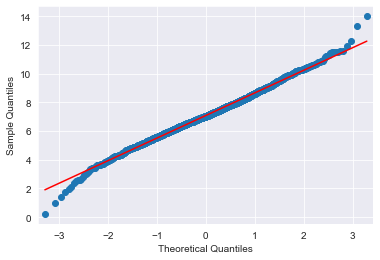

In [13]:
qqplot(wq_df['ph'],line='s')
plt.show()

In [14]:
s, q = stats.shapiro(wq_df['ph']) 
if q <0.05:
    print(f'p-value = {round(q,2)} < 0.05, so the pH values in the dataset are normally distributed.')
else:
    print(f'p-value = {round(q,2)} > 0.05, so the pH values in the dataset are not normally distributed.')

p-value = 0.0 < 0.05, so the pH values in the dataset are normally distributed.


In [15]:
y_safe = wq_df[wq_df['potability']==1]
n_safe = wq_df[wq_df['potability']==0] 
z, v = ztest(y_safe['ph'], n_safe['ph'])
if v < 0.05:
    print(f'p-value = {round(v,2)} < 0.05, so the null hypothesis is rejected.There is significant difference in the mean of ph values between potable water and non-potable water.')
else:
    print(f'p-value = {round(v,2)} > 0.05, so the null hypothesis is not rejected. There is no significant difference in the mean of ph values between potable water and non-potable water.')

p-value = 0.51 > 0.05, so the null hypothesis is not rejected. There is no significant difference in the mean of ph values between potable water and non-potable water.


* Based on the qq plot and shapiro test, the pH values in the dataset are normally distributed. 
* The z-test showed that there is no significant relationship between pH value and potability of water.
* However, it would be kept until we use `Boruta` to judge if it is needed for the analysis of water potability.  

In [16]:
a, b = stats.f_oneway(wq_df[wq_df['ph_category'] == 'acidic level']['hardness'],
                      wq_df[wq_df['ph_category'] == 'normal pH_surface water']['hardness'],
                      wq_df[wq_df['ph_category'] == 'alkaline level']['hardness'])

print('ANOVA test for mean hardness levels across water samples with different ph category')
print('F Statistic:', a, '\tp-value:', b )

if b < 0.05:
    print(f'p-value = {b} < 0.05; reject the null hypothesis in favor of the alternative. There is a statistically significant difference in hardness for at least two groups out of the three of pH categories.')
else:
    print(f'p-value = {b} > 0.05; do not reject the null hypothesis. Hardness across the three pH categories are not statistically significantly different.')

ANOVA test for mean hardness levels across water samples with different ph category
F Statistic: 13.254665649293692 	p-value: 1.9109022526929406e-06
p-value = 1.9109022526929406e-06 < 0.05; reject the null hypothesis in favor of the alternative. There is a statistically significant difference in hardness for at least two groups out of the three of pH categories.


In [17]:
f, p = stats.f_oneway(wq_df[wq_df['ph_category'] == 'acidic level']['trihalomethanes'],
                      wq_df[wq_df['ph_category'] == 'normal pH_surface water']['trihalomethanes'],
                      wq_df[wq_df['ph_category'] == 'alkaline level']['trihalomethanes'])

print('ANOVA test for mean trihalomethanes levels across water samples with different ph category')
print('F Statistic:', f, '\tp-value:', p)

if p < 0.05:
    print(f'p-value = {round(p,2)} < 0.05; reject the null hypothesis in favor of the alternative. There is a statistically significant difference in trihalomethanes for at least two groups out of the three of pH categories.')
else:
    print(f'p-value = {round(p,2)} > 0.05; do not reject the null hypothesis. Trihalomethanes across the three pH categories are not statistically significantly different.')

ANOVA test for mean trihalomethanes levels across water samples with different ph category
F Statistic: 1.0411259574341782 	p-value: 0.35324743522749014
p-value = 0.35 > 0.05; do not reject the null hypothesis. Trihalomethanes across the three pH categories are not statistically significantly different.


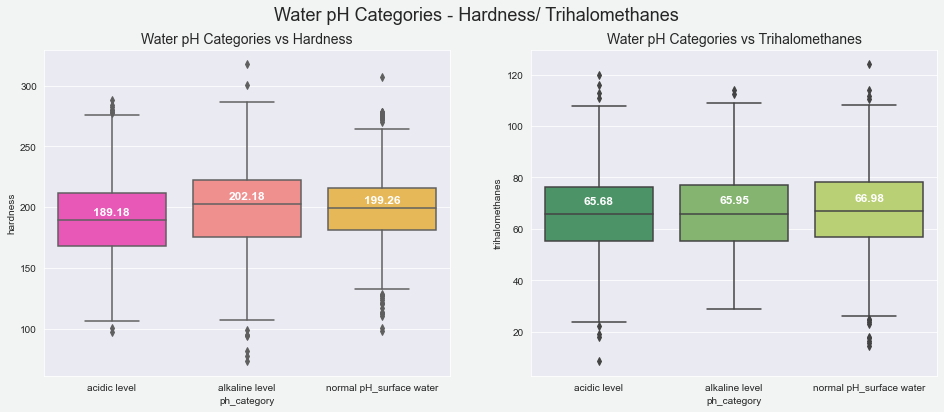

In [18]:
fig, ax = plt.subplots(1,2,figsize=(16,6), facecolor='#F2F4F4')
h = sns.boxplot(x="ph_category", y="hardness", data=wq_df, ax=ax[0],palette='spring')
h.set_title('Water pH Categories vs Hardness',fontsize=14)
median_hardness = round(wq_df.groupby(['ph_category'])['hardness'].median(),2)
vertical_offset = wq_df['hardness'].median() * 0.02 # offset from median for display
for xtick in h.get_xticks():
    h.text(xtick,
           median_hardness[xtick] + vertical_offset,
           median_hardness[xtick], 
           horizontalalignment='center',
           size='large',
           color='w',
           weight='semibold')

t = sns.boxplot(x='ph_category', y='trihalomethanes', data=wq_df, ax=ax[1],palette='summer')
t.set_title('Water pH Categories vs Trihalomethanes',fontsize=14)
median_th = round(wq_df.groupby(['ph_category'])['trihalomethanes'].median(),2)
vertical_offset = wq_df['hardness'].median() * 0.02 # offset from median for display
for xtick in t.get_xticks():
    t.text(xtick,
           median_th[xtick] + vertical_offset,
           median_th[xtick], 
           horizontalalignment='center',
           size='large',
           color='w',
           weight='semibold')

plt.suptitle('Water pH Categories - Hardness/ Trihalomethanes',fontsize=18);

The boxplots above showed that stark differences in hardness levels based on pH categories as compared to trihalomethanes levels, which are between 189.18 - 202.18 and in fact if you look at the median values for trihalomethanes levels across the three categories, it is approximately 65.6-67.0 across the three groups as compared to hardness levels, which varies significantly.

## Explanatory Data Analysis

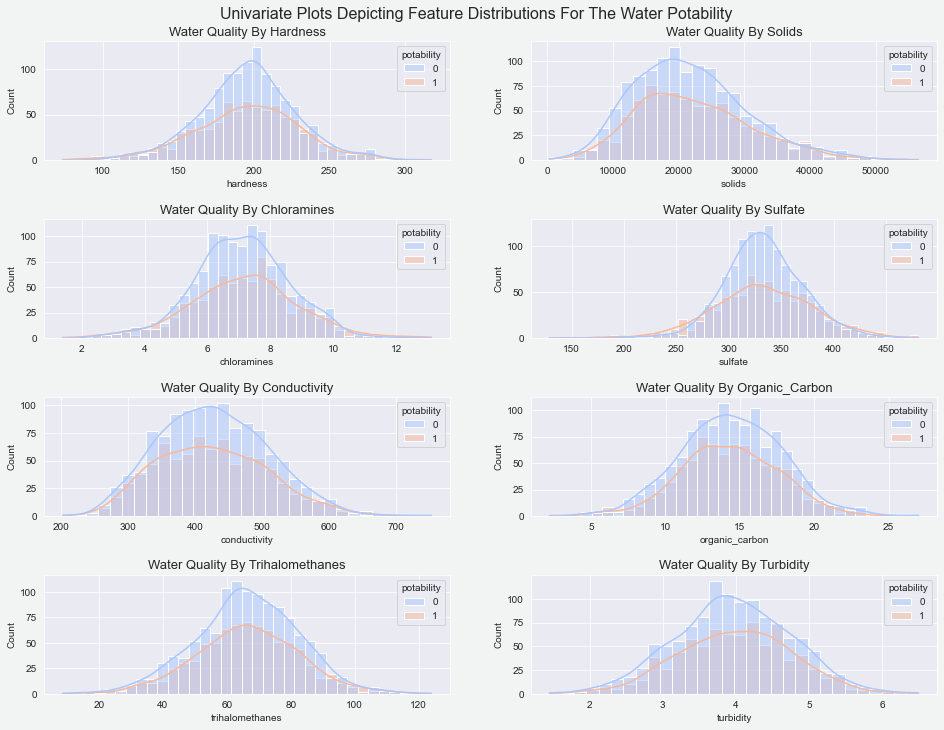

In [19]:
fig, ax = plt.subplots(figsize=(16,12), facecolor='#F2F4F4')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
count=1
for i in wq_df.columns[1:-2]:
    plt.subplot(4,2,count)
    h = sns.histplot(x=i, kde=True,data=wq_df,hue='potability',palette='coolwarm')
    h.set_title(('water quality by ' + i).title(), fontsize=13)
    count+=1
fig.suptitle(('Univariate plots depicting feature distributions for the water potability').title(), 
             x=0.5, y=0.92, fontsize=16);

* Chloramines (also known as secondary disinfection) are disinfectants used to treat drinking water. They are most commonly formed when ammonia is added to chlorine to treat drinking water. They provide longer-lasting disinfection as the water moves through pipes to consumers. From the visualization of 'Water Quality By Chloramines', it is also found that the potable water has a higher chloramine level as it is negatively skewed with its mode greater than its median and mean.  

* Turbidity is the measure of relative clarity of a liquid and it is a measurement of the amount of light that is scattered by material in the water when a light is shined through the water sample. The higher the intensity of scattered light, the higher the turbidity. Material that causes water to be turbid include clay, silt, very tiny inorganic and organic matter, algae, dissolved colored organic compounds, and plankton and other microscopic organisms. It is found that the potable has a higher turbidity as its distribution is also negatively skewed and most of the water sample are found to have turbidity of about 4.7. 

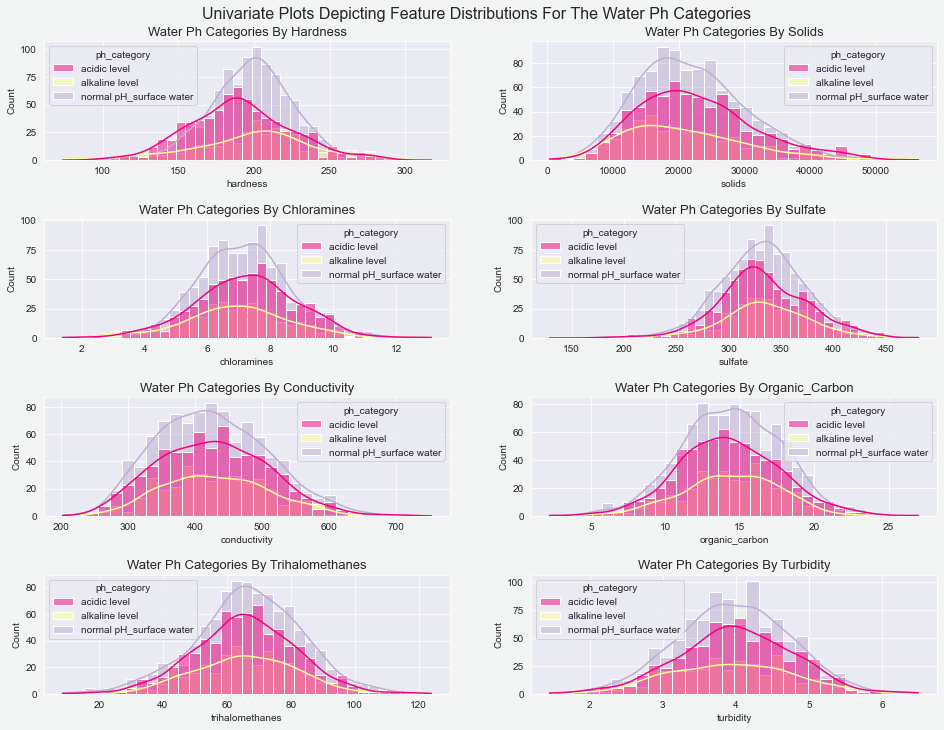

In [20]:
fig, ax = plt.subplots(figsize=(16,12), facecolor='#F2F4F4')
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
var = wq_df.loc[:,(wq_df.columns!='potability')&(wq_df.columns!='ph')].columns.to_list()
count=1
for i in var[:-1]:
    plt.subplot(4,2,count)
    h = sns.histplot(x=i, kde=True,data=wq_df,hue='ph_category',palette='Accent_r')
    h.set_title(('water ph categories by ' + i).title(), fontsize=13)
    count+=1
fig.suptitle(('Univariate plots depicting feature distributions for the water pH categories').title(), 
             x=0.5, y=0.92, fontsize=16);

* If we look at the pH categories by hardness level,  we can notice that the distribution is negatively skewed, whereby it conforms with the fact that water is considered hard when the pH level is above 8.5 (<a href="https://www.atsenvironmental.com/residential/water/contaminants/list/ph-levels/#:~:text=Water%20is%20considered%20hard%20when,such%20as%20tea%20or%20coffee.">ATS Environmental</a>, 2022). 

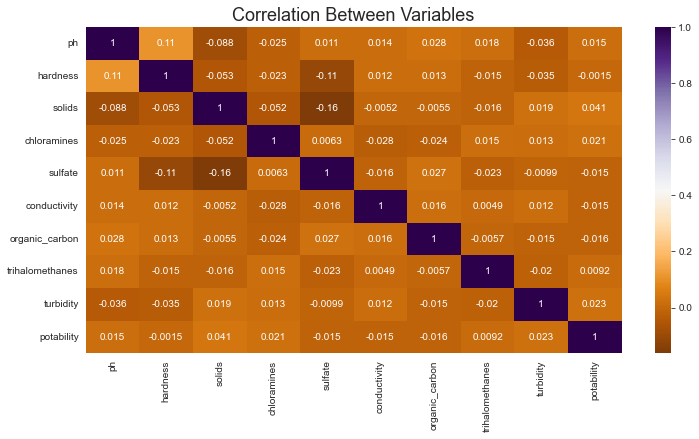

In [21]:
plt.figure(figsize=(12,6))
sns.heatmap(wq_df.corr(),fmt='.2g',annot=True, cmap="PuOr")
plt.title('Correlation Between Variables', fontsize=18);

<Figure size 864x432 with 0 Axes>

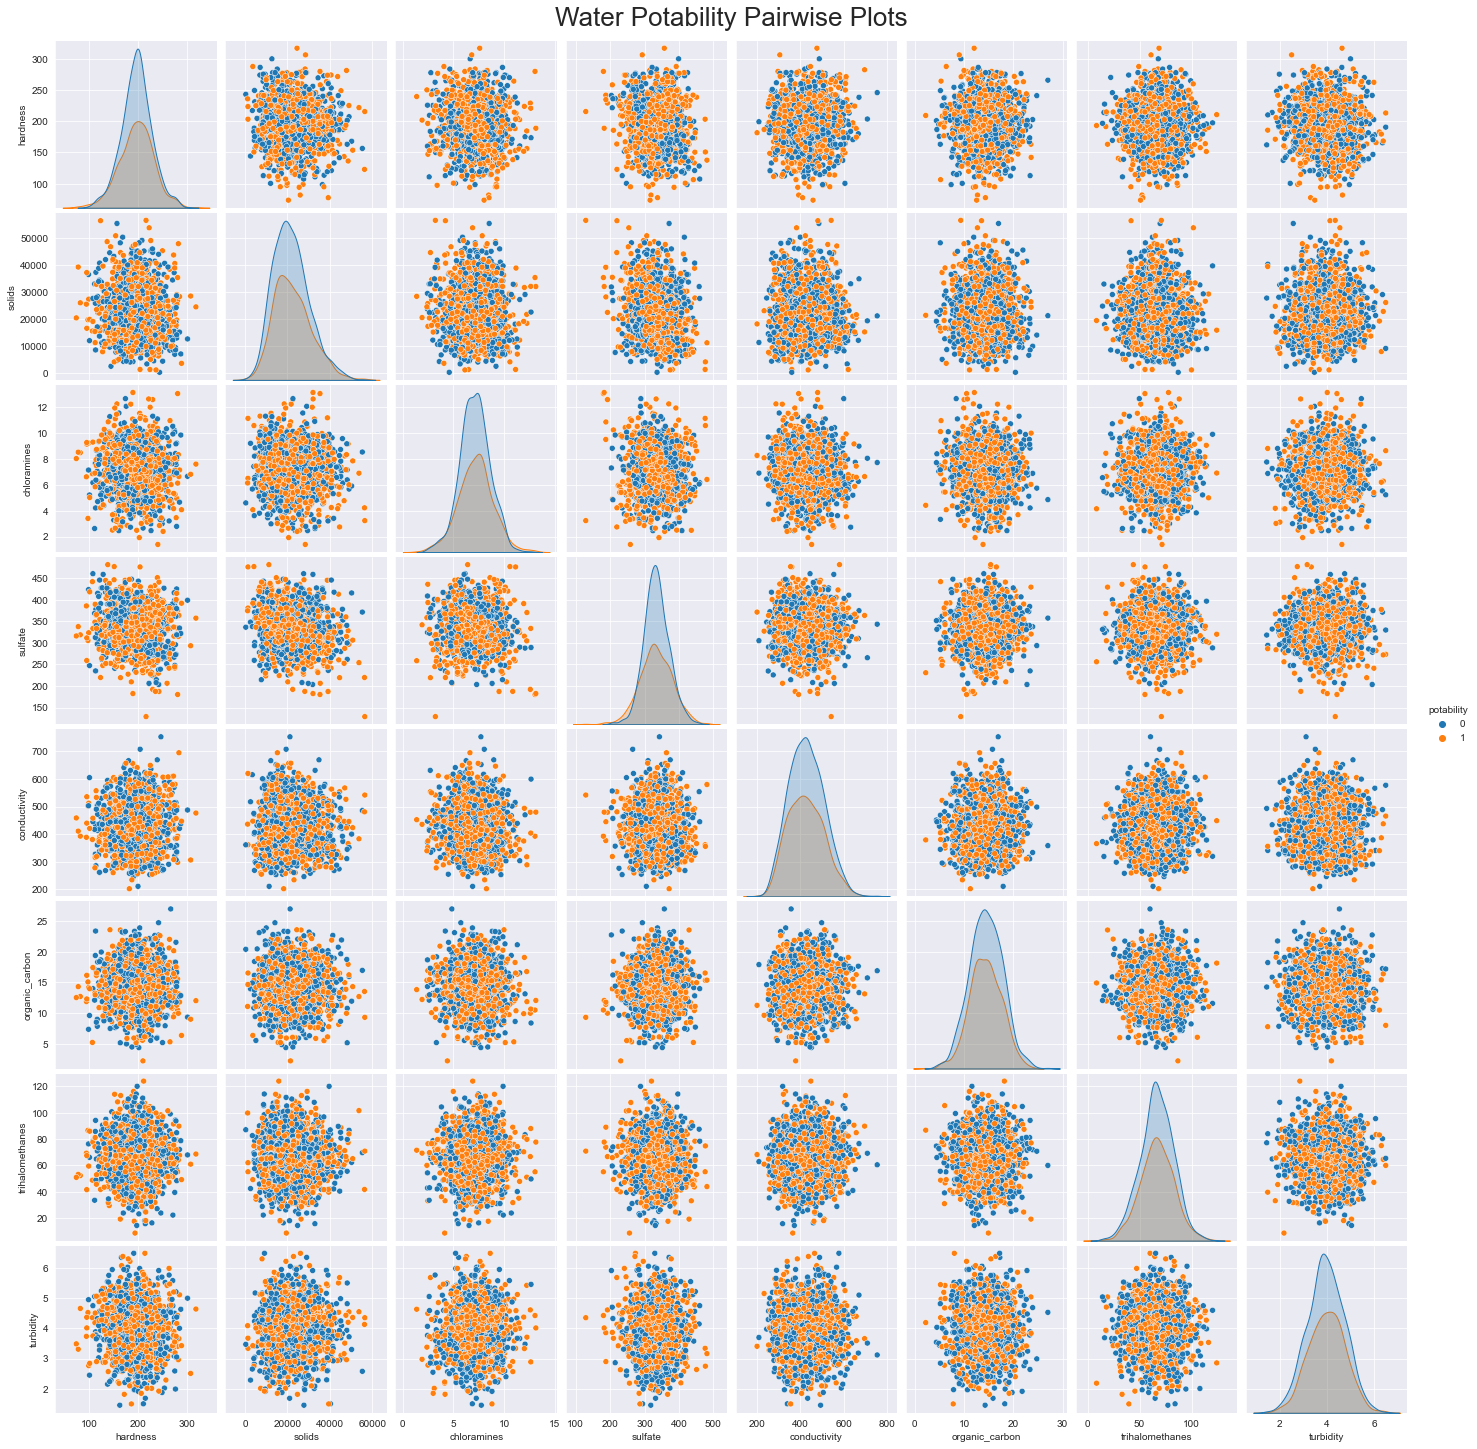

In [22]:
plt.figure(figsize=(12,6))
pairplot1 = sns.pairplot(wq_df.iloc[:,1:-1], hue='potability')
pairplot1.fig.suptitle("Water Potability Pairwise Plots",fontsize=26, y=1.01); 

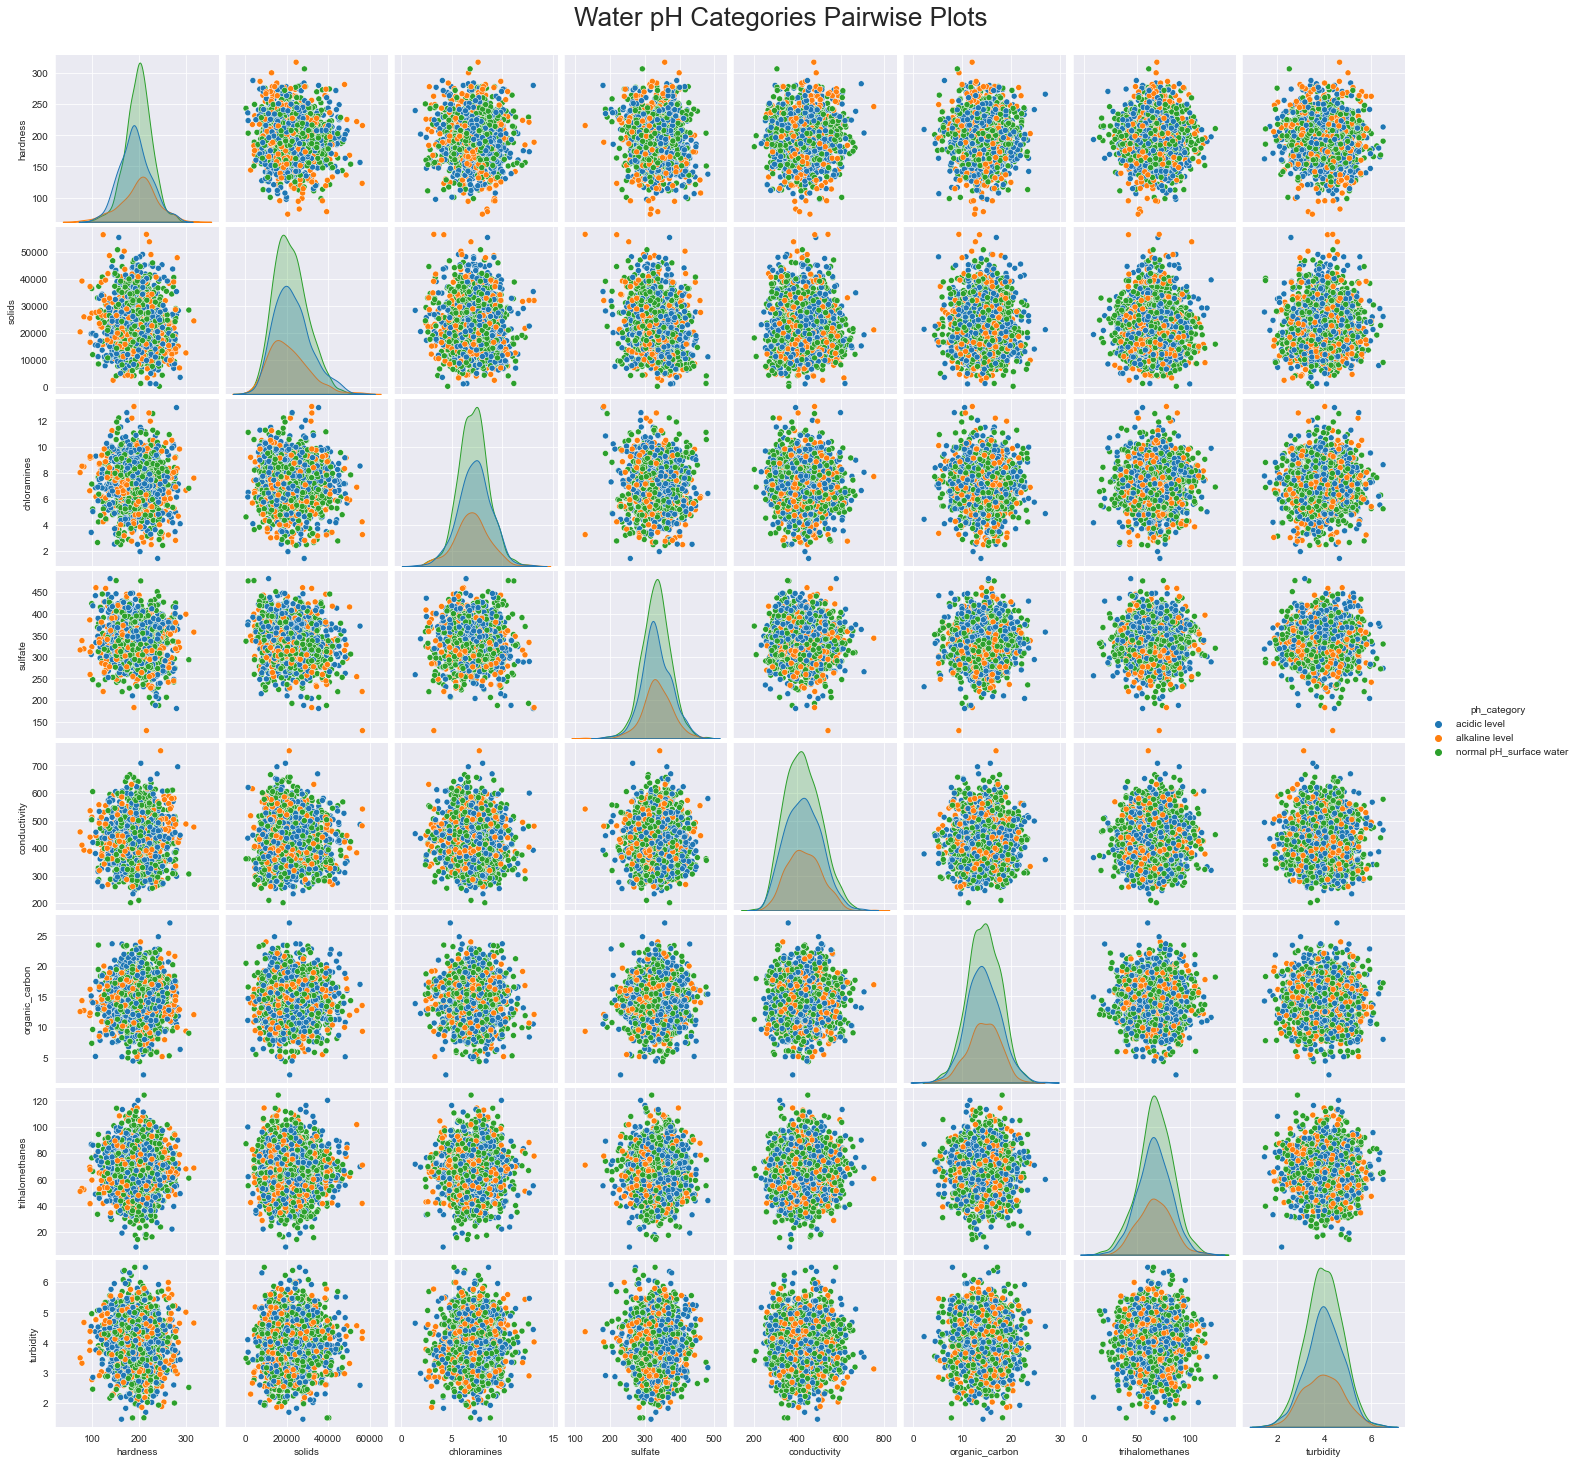

In [23]:
pairplot2 = sns.pairplot(wq_df[var], hue='ph_category')
pairplot2.fig.suptitle('Water pH Categories Pairwise Plots',fontsize=26, y=1.02); 

Based on the pairplots above, there seems to be not much correlation between all the features.

# Model Building & Evaluation - Predicting Water Potability

In [24]:
X = wq_df[wq_df.columns[:-2]]
Y = wq_df['potability']

In [25]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print('Target_train: ', Counter(Y_train))
print('Target_test:',Counter(Y_test))
print('Features:', list(wq_df.columns[0:-2]))

Target_train:  Counter({0: 907, 1: 601})
Target_test: Counter({0: 293, 1: 210})
Features: ['ph', 'hardness', 'solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity']


In [26]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
X_train

array([[0.65414711, 0.80672803, 0.19785735, ..., 0.51163596, 0.51377533,
        0.82013919],
       [0.60083982, 0.58961108, 0.66894027, ..., 0.38242083, 0.606509  ,
        0.59086205],
       [0.44090003, 0.59607739, 0.36850975, ..., 0.45825212, 0.46668543,
        0.3975664 ],
       ...,
       [0.56301163, 0.53877365, 0.13030161, ..., 0.36980345, 0.50861026,
        0.55367155],
       [0.584646  , 0.56282224, 0.26582554, ..., 0.60959309, 1.        ,
        0.2782631 ],
       [0.50504886, 0.31315374, 0.27137313, ..., 0.3245884 , 0.57979546,
        0.69161015]])

In [28]:
#feature selection using Boruta
# define baseline model
rf_clf = RF(random_state=42, class_weight='balanced',n_jobs=-1)
rf_clf.fit(X_train,Y_train)

# Apply The Full Featured Classifier To The Test Data
y_pred = rf_clf.predict(X_test)
ac = accuracy_score(Y_test, y_pred)

# View The Accuracy Of Our Full Feature (8 Features) Model
print("Baseline Model Accuracy:", ac)

Baseline Model Accuracy: 0.6699801192842942


In [29]:
# define Boruta feature selection method
boruta_selector = BorutaPy(rf_clf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(Y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	2
Rejected: 	3
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	3
Iteration: 	17 / 

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=34, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x228BD01D440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x228BD01D440, verbose=2)

In [30]:
# check selected features
print("Selected Features: ", boruta_selector.support_)
 
# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True False False False False]
Ranking:  [1 1 1 1 1 5 2 4 3]
No. of significant features:  5


In [31]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Feature  Ranking
0               ph        1
1         hardness        1
2           solids        1
3      chloramines        1
4          sulfate        1
6   organic_carbon        2
8        turbidity        3
7  trihalomethanes        4
5     conductivity        5

In [32]:
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

# Create a new random forest classifier for the most important features
rf_important = RF(random_state=42, class_weight='balanced',n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, Y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

In [33]:
# Apply The Limited Featured Classifier To The Test Data
y_important_pred = rf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_ac = accuracy_score(Y_test, y_important_pred)

print("Limited Features Boruta Model Accuracy:", rf_imp_ac)

Limited Features Boruta Model Accuracy: 0.6679920477137177


In [34]:
classifiers = []
log_reg = LogisticRegression(max_iter=10000, class_weight='balanced')
classifiers.append(log_reg)
ridge_clf =  RidgeClassifier(random_state=42, class_weight='balanced')
classifiers.append(ridge_clf)
knn_neg = KNeighborsClassifier(metric='euclidean') 
classifiers.append(knn_neg)
dt_clf = DT(random_state=42, class_weight='balanced')
classifiers.append(dt_clf)
rf_clf = RF(random_state=42, class_weight='balanced',n_estimators=500)
classifiers.append(rf_clf)
etree_clf = ET(random_state=42, class_weight='balanced')
classifiers.append(etree_clf)
ab_clf = AB(random_state=42)
classifiers.append(ab_clf)
xgb_clf = XGBClassifier(objective="binary:logistic", random_state=42)
classifiers.append(xgb_clf)
GNB_model = GNB() 
classifiers.append(GNB_model)
SVM_clf = SVC(random_state=42, probability=True, class_weight='balanced')
classifiers.append(SVM_clf)
classifiers

[LogisticRegression(class_weight='balanced', max_iter=10000),
 RidgeClassifier(class_weight='balanced', random_state=42),
 KNeighborsClassifier(metric='euclidean'),
 DecisionTreeClassifier(class_weight='balanced', random_state=42),
 RandomForestClassifier(class_weight='balanced', n_estimators=500,
                        random_state=42),
 ExtraTreesClassifier(class_weight='balanced', random_state=42),
 AdaBoostClassifier(random_state=42),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,
    

In [35]:
accuracy_train_pot = []
accuracy_test_pot = []
for clf in classifiers:
    clf.fit(X_important_train, Y_train)
    pred_train_pot = clf.predict(X_important_train)
    pred_test_pot = clf.predict(X_important_test)
    an = round(accuracy_score(Y_train, pred_train_pot)*100,2)
    at = round(accuracy_score(Y_test, pred_test_pot)*100,2)
    accuracy_train_pot.append(an)
    accuracy_test_pot.append(at)

In [36]:
original_result = pd.DataFrame(data={'Model':['LR','KNN','Ridge','DT','RF','ET','AdaBoost','XGB','Gaussian Bayes','SVC'],
                                     'Accuracy_Training (%)':accuracy_train_pot,
                                     'Accuracy_Test (%)': accuracy_test_pot})
original_result.sort_values('Accuracy_Test (%)',ascending=False)

Model  Accuracy_Training (%)  Accuracy_Test (%)
5              ET                 100.00              67.99
2           Ridge                  78.45              67.40
4              RF                 100.00              66.20
7             XGB                  99.80              66.20
9             SVC                  73.54              65.41
3              DT                 100.00              62.62
8  Gaussian Bayes                  62.47              62.23
6        AdaBoost                  65.65              61.83
0              LR                  53.32              49.50
1             KNN                  53.25              48.91

From the results above, it is clearly seen that the decision tree, random forest, extra tree and xgb models have overfitting (unable to generalize well) problems. Hence, we would need to perform cross-validation.

In [37]:
ac_train_cv = []
ac_test_cv = []
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
for i in classifiers:
    score_train = cross_val_score(i,X_important_train,Y_train,scoring='accuracy', cv=kf)
    score_test = cross_val_score(i,X_important_test,Y_test,scoring='accuracy', cv=kf)
    ac_train_cv.append(round(score_train.mean()*100,2))
    ac_test_cv.append(round(score_test.mean()*100,2))

In [38]:
cv_result = pd.DataFrame(data={'Model':['LR','KNN','Ridge','DT','RF','ET','AdaBoost','XGB','Gaussian Bayes','SVC'],
                               'Accuracy on Training Data (%)':ac_train_cv,
                               'Accuracy on Testing Data (%)':ac_test_cv})
cv_result.sort_values(by=['Accuracy on Testing Data (%)'],ascending=False)

Model  Accuracy on Training Data (%)  Accuracy on Testing Data (%)
9             SVC                          68.24                         65.83
4              RF                          69.36                         63.43
5              ET                          69.03                         62.63
7             XGB                          67.11                         61.05
2           Ridge                          67.11                         60.67
8  Gaussian Bayes                          62.14                         60.47
6        AdaBoost                          59.55                         57.66
3              DT                          61.87                         54.89
1             KNN                          50.99                         48.12
0              LR                          51.19                         48.11

Based on the cross validation result, we chose the top 5 models based on the Accuracy on Testing Data (%). The chosen models are the SVC, random forest, extra-trees, ridge and XGB classifiers. Next, hyperparameter tuning is performed on these 5 models. 

In [39]:
rf_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [40]:
%%time
tuned_classifiers = []
params = []
score = []
param_rf = {'max_depth': [i for i in range(20, 35, 5)], 
            'min_samples_leaf': [3,7,11], 
            'max_features': [1,3,6]}
RF(random_state=42, class_weight='balanced',n_estimators=500)
grid_rf = GridSearchCV(rf_clf, param_rf, cv=10, scoring='accuracy', return_train_score=True)
grid_rf.fit(X_important_train, Y_train)
final_rf = grid_rf.best_estimator_
tuned_classifiers.append(final_rf)
params.append(grid_rf.best_params_)
best_score_rf = round(grid_rf.best_score_*100,2)
score.append(best_score_rf)

CPU times: total: 8min 49s
Wall time: 8min 56s


In [41]:
etree_clf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [42]:
%%time
param_etree = {'max_depth': [i for i in range(20, 35, 5)], 
               'min_samples_leaf': [3,7,11], 
               'max_features': [1,3,6],
               'n_estimators': [50,100,150]}
etree_clf = ET(random_state=42, class_weight='balanced')
grid_etree = GridSearchCV(etree_clf, param_etree, cv=10, scoring='accuracy', return_train_score=True)
grid_etree.fit(X_important_train, Y_train)
final_etree = grid_etree.best_estimator_
tuned_classifiers.append(final_etree)
params.append(grid_etree.best_params_)
best_score_etree = round(grid_etree.best_score_*100,2)
score.append(best_score_etree)

CPU times: total: 2min 47s
Wall time: 2min 49s


In [43]:
ridge_clf.get_params().keys()

dict_keys(['alpha', 'class_weight', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'random_state', 'solver', 'tol'])

In [44]:
%%time
param_ridge = {'alpha' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
               'solver' : ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

ridge_clf =  RidgeClassifier(random_state=42, class_weight='balanced')
grid_ridge = GridSearchCV(ridge_clf, param_ridge, cv=10, scoring='accuracy', return_train_score=True)
grid_ridge.fit(X_important_train, Y_train)
final_ridge = grid_ridge.best_estimator_
tuned_classifiers.append(final_ridge)
params.append(grid_ridge.best_params_)
best_score_ridge = round(grid_ridge.best_score_*100,2)
score.append(best_score_ridge)

CPU times: total: 19.1 s
Wall time: 5.37 s


In [45]:
SVM_clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [46]:
%%time
param_svc = {'C': [0.1, 1, 10, 100, 1000],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf']}
SVM_clf = SVC(random_state=42, probability=True, class_weight='balanced')
grid_svc = GridSearchCV(SVM_clf, param_svc, cv=10, scoring='accuracy', return_train_score=True)
grid_svc.fit(X_important_train, Y_train)
final_svc = grid_svc.best_estimator_
tuned_classifiers.append(final_svc)
params.append(grid_svc.best_params_)
best_score_svc = round(grid_svc.best_score_*100,2)
score.append(best_score_svc)

CPU times: total: 6min 11s
Wall time: 6min 24s


In [47]:
xgb_clf.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'callbacks', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'early_stopping_rounds', 'enable_categorical', 'eval_metric', 'gamma', 'gpu_id', 'grow_policy', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_bin', 'max_cat_to_onehot', 'max_delta_step', 'max_depth', 'max_leaves', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'sampling_method', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [48]:
%%time
param_xgb = {'max_depth': [3,6,18],
             'gamma': [3,5,7,9],
             'min_child_weight' : [3,7,10],
             'n_estimators': [100,130,180]}
xgb_clf = XGBClassifier(objective="binary:logistic", random_state=42)
grid_xgb = GridSearchCV(xgb_clf, param_xgb, cv=10, scoring='accuracy', return_train_score=True)
grid_xgb.fit(X_important_train, Y_train)
final_xgb = grid_xgb.best_estimator_
tuned_classifiers.append(final_xgb)
params.append(grid_xgb.best_params_)
best_score_xgb = round(grid_xgb.best_score_*100,2)
score.append(best_score_xgb)

CPU times: total: 36min 32s
Wall time: 7min 10s


In [49]:
tuned_result = pd.DataFrame(data={'Model':['RF','E.TREE','Ridge','SVC','XGB'], 
                                  'Best Parameters':params, 'Score (%)': score})
tuned_result.sort_values('Score (%)', ascending =False)

Model                                    Best Parameters  Score (%)
0      RF  {'max_depth': 30, 'max_features': 3, 'min_samp...      69.63
1  E.TREE  {'max_depth': 25, 'max_features': 3, 'min_samp...      69.36
3     SVC            {'C': 100, 'gamma': 1, 'kernel': 'rbf'}      68.57
4     XGB  {'gamma': 3, 'max_depth': 6, 'min_child_weight...      67.64
2   Ridge                   {'alpha': 0.1, 'solver': 'lsqr'}      52.85

In [50]:
tuned_accuracy_train = []
tuned_accuracy_test = []

for clf in tuned_classifiers:
    clf.fit(X_important_train, Y_train)
    tuned_pred_train = clf.predict(X_important_train)
    tuned_pred_test = clf.predict(X_important_test)
    accuracy_train = round(accuracy_score(Y_train, tuned_pred_train)*100,2)
    accuracy_test = round(accuracy_score(Y_test, tuned_pred_test)*100,2)
    tuned_accuracy_train.append(accuracy_train)
    tuned_accuracy_test.append(accuracy_test)
    
tuned_result_pot = pd.DataFrame(data={'Model':['RF','E.TREE','Ridge','SVC','XGB'], 
                                      'Training Score (%)': tuned_accuracy_train,
                                      'Testing Score (%)': tuned_accuracy_test})
tuned_result_pot.sort_values('Testing Score (%)', ascending = False)

Model  Training Score (%)  Testing Score (%)
4     XGB               82.82              67.40
3     SVC               71.15              66.40
1  E.TREE               96.75              66.20
0      RF               98.61              65.81
2   Ridge               53.18              48.71

In [57]:
acctrain = []
acctest = []
def print_result(model): 
    model.fit(X_important_train, Y_train)
    predicted_train = model.predict(X_important_train)
    predicted_test = model.predict(X_important_test)
    accuracy_model_train = round(accuracy_score(Y_train, predicted_train)*100,2)
    accuracy_model_test = round(accuracy_score(Y_test, predicted_test)*100,2)
    acctrain.append(accuracy_model_train)
    acctest.append(accuracy_model_test)
    print(f'Accuracy on training data: {accuracy_model_train}%')
    print(f'Accuracy on testing data: {accuracy_model_test}%')

In [58]:
# form a voting classifier using the models that returned accuracy of more than 60% on the testing data
voting_clf = VotingClassifier(estimators = [('XGB',final_xgb), ('RF',final_rf), ('ET',final_etree), ('SVC',final_svc)],
                              voting = 'soft')
print('Result of Voting Classifier')
print_result(voting_clf)

Result of Voting Classifier
Accuracy on training data: 90.38%
Accuracy on testing data: 68.19%


In [53]:
print(final_etree)
print(final_rf)

ExtraTreesClassifier(class_weight='balanced', max_depth=25, max_features=3,
                     min_samples_leaf=3, n_estimators=50, random_state=42)
RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=3,
                       min_samples_leaf=3, n_estimators=500, random_state=42)


In [59]:
# Use tuned SVC, extra-trees & random forest models as base estimators and tuned XGB model as the final estimator
# Create Base Learners
base_learners = [('svc',final_svc), 
                 ('etree', ET(class_weight='balanced', max_depth=25, max_features=0.3,
                              min_samples_leaf=3, n_estimators=50, random_state=42)), 
                 ('rf', RF(class_weight='balanced', max_depth=30, max_features=0.3,
                           min_samples_leaf=3, n_estimators=500, random_state=42)),
                 ('ridge_2', final_ridge)]
# Initialize Stacking Classifier 
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=final_xgb)
print('Result of Stacking Classifier')
print_result(stacking_clf)

Result of Stacking Classifier
Accuracy on training data: 77.92%
Accuracy on testing data: 67.2%


In [60]:
# Multi-layer Stacking
# Create learners per layer
layer_one = [('ridge_2', final_ridge), 
             ('etree_2', ET(class_weight='balanced', max_depth=25, max_features=0.3,
                            min_samples_leaf=3, n_estimators=50, random_state=42))]
layer_two_est = [('svc_2', final_svc),
                 ('rf_2', RF(class_weight='balanced', max_depth=30, max_features=0.3,
                             min_samples_leaf=3, n_estimators=500, random_state=42))]
layer_two = StackingClassifier(estimators=layer_two_est, final_estimator=final_xgb)
# Create multi-layer stacking model 
stack_clf = StackingClassifier(estimators=layer_one, final_estimator=layer_two)
print('Result of Multi-Layer Stacking Classifier')
print_result(stack_clf)

Result of Multi-Layer Stacking Classifier
Accuracy on training data: 76.99%
Accuracy on testing data: 67.59%


In [61]:
ensemble_learners = ['Voting Classifier','Stacking Classifer','Multi-Layer Stacking Classifer']
ensemble_result = pd.DataFrame(data={'Model':ensemble_learners, 
                                     'Training Score (%)': acctrain,
                                     'Testing Score (%)': acctest})
ensemble_result.sort_values('Testing Score (%)', ascending = False)

Model  Training Score (%)  Testing Score (%)
0               Voting Classifier               90.38              68.19
2  Multi-Layer Stacking Classifer               76.99              67.59
1              Stacking Classifer               77.92              67.20

The voting classifier above is built using the tuned random forest, extra-trees, SVC, and XGB models. The voting classifier returned accuracy of 90.38% on the training data and an accuracy of 68.19% on the testing data, and these are higher as compared to stacking classifiers, and the five models tuned earlier. Since the voting classifier returned the highest accuracy on the testing data, so it would be used as the final model to predict the water potability. 
<br>
🎶 Let's try to tune this voting classifier.    

In [62]:
%%time 
param_voting = {'weights': [(1,1,1,1),(1,2,1,1),(1,1,2,1),(1,1,1,2),(2,1,1,1),
                            (2,2,1,1),(1,2,2,1),(1,1,2,2),(2,1,2,1),(1,2,1,2),
                            (2,2,2,1),(2,2,1,2),(2,1,2,2),(1,2,2,2)]}
grid_voting = GridSearchCV(voting_clf, param_voting, cv=10, scoring='accuracy', return_train_score=True)
grid_voting.fit(X_important_train, Y_train)
final_voting = grid_voting.best_estimator_
print(f'Best parameters for voting classifier: {grid_voting.best_params_}')
print(f'Average tuned cross-validation score for final voting classifier: {round(grid_voting.best_score_*100,2)}%')
final_voting.fit(X_important_train, Y_train)
final_voting_train = final_voting.predict(X_important_train)
final_voting_test = final_voting.predict(X_important_test)
accuracy_final_voting_train = round(accuracy_score(Y_train, final_voting_train)*100,2)
accuracy_final_voting_test = round(accuracy_score(Y_test, final_voting_test)*100,2)
print('Accuracy for final voting classifier on training data', accuracy_final_voting_train,'%')
print('Accuracy for final voting classifier on testing data', accuracy_final_voting_test,'%')

Best parameters for voting classifier: {'weights': (1, 2, 2, 2)}
Average tuned cross-validation score for final voting classifier: 69.83%
Accuracy for final voting classifier on training data 91.91 %
Accuracy for final voting classifier on testing data 68.19 %
CPU times: total: 19min 19s
Wall time: 13min 35s


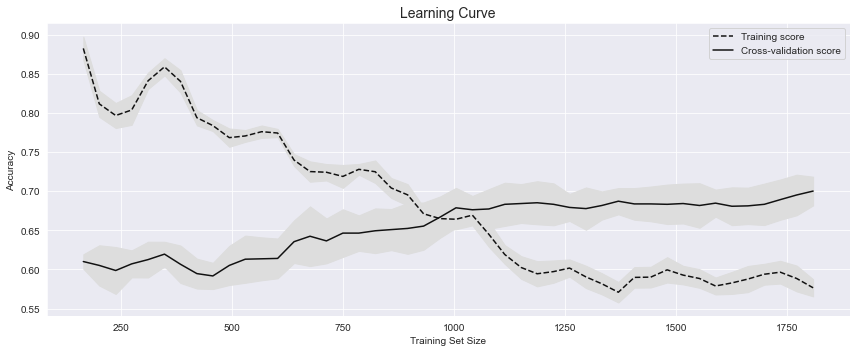

CPU times: total: 2.59 s
Wall time: 9min 15s


In [63]:
%%time 
X_important = X[['ph','hardness','solids','chloramines','sulfate']]
plt.figure(figsize = (12,5))
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(final_voting, X_important, Y, 
                                                        cv=kf,scoring='accuracy', n_jobs=-1,
                                                        train_sizes=np.linspace(0.01,1.0,50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve", fontsize=14)
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

The accuracy of the voting classifier at 50 different training set sizes ranging from 1% of observations to 100% is plotted. 
The increasing accuracy score of the cross-validated models tell us that we would likely benefit from additional observations (although in practice this might not be feasible).

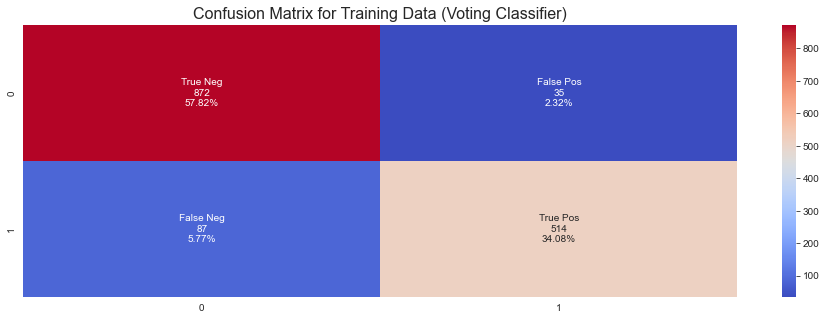

In [64]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
train_cnf_matrix = confusion_matrix(Y_train,final_voting_train)
train_counts = ["{0:0.0f}".format(value) for value in train_cnf_matrix.flatten()]
train_percentage = ["{0:.2%}".format(value) for value in train_cnf_matrix .flatten()/np.sum(train_cnf_matrix)]
train_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,train_counts,train_percentage)]
train_labels = np.asarray(train_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(train_cnf_matrix, annot=train_labels, fmt='', cmap='coolwarm')
plt.title('Confusion Matrix for Training Data (Voting Classifier)',fontsize=16);

In [65]:
print("Classification report (Training): \n")
print(f"{classification_report(Y_train,final_voting_train)}")

Classification report (Training): 

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       907
           1       0.94      0.86      0.89       601

    accuracy                           0.92      1508
   macro avg       0.92      0.91      0.91      1508
weighted avg       0.92      0.92      0.92      1508



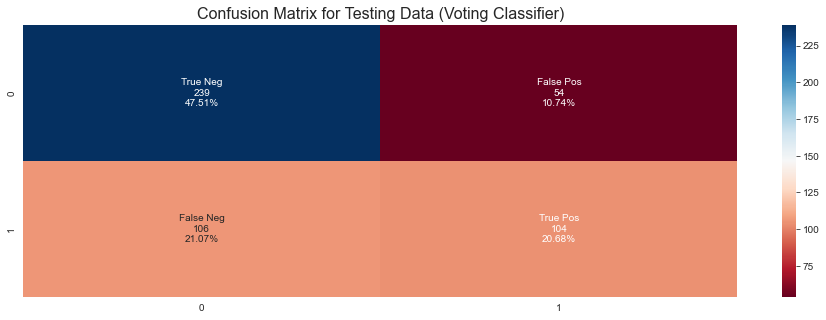

In [67]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
test_cnf_matrix = confusion_matrix(Y_test,final_voting_test)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='RdBu')
plt.title('Confusion Matrix for Testing Data (Voting Classifier)',fontsize=16);

In [68]:
print("Classification report (Testing): \n")
print(f"{classification_report(Y_test,final_voting_test)}")

Classification report (Testing): 

              precision    recall  f1-score   support

           0       0.69      0.82      0.75       293
           1       0.66      0.50      0.57       210

    accuracy                           0.68       503
   macro avg       0.68      0.66      0.66       503
weighted avg       0.68      0.68      0.67       503



# Making New Prediction - Water Potability

In [69]:
def predict(model, inputs):
    input_df = pd.DataFrame([inputs])
    pred = model.predict(input_df)[0]
    return pred

In [70]:
first_input = {'ph':6.8,
               'hardness': 129.932,
               'solids': 19440.861,
               'chloramines': 9.143,
               'sulfate': 295.514}

In [72]:
predict(final_voting, first_input)

1

In [73]:
joblib.dump(voting_clf, "votingclf_potability.pkl")
# vclf = joblib.load("votingclf_potability.pkl") # to load the saved model

['votingclf_potability.pkl']

# Model Building & Evaluation - Predicting Water pH Categories

In [74]:
print('acidic :', len(wq_df[wq_df['ph_category']=='acidic level']))
print('alklaine :', len(wq_df[wq_df['ph_category']=='alkaline level']))
print('normal surface water pH :', len(wq_df[wq_df['ph_category']=='normal pH_surface water']))

acidic : 692
alklaine : 358
normal surface water pH : 961


In [75]:
X = wq_df[wq_df.columns[1:-1]]
Y = wq_df['ph_category']

In [76]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(Counter(Y_train),Counter(Y_test))
print('Features:', list(wq_df.columns[1:-1]))

Counter({'normal pH_surface water': 714, 'acidic level': 533, 'alkaline level': 261}) Counter({'normal pH_surface water': 247, 'acidic level': 159, 'alkaline level': 97})
Features: ['hardness', 'solids', 'chloramines', 'sulfate', 'conductivity', 'organic_carbon', 'trihalomethanes', 'turbidity', 'potability']


In [77]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
Y_train = Y_train.map({'acidic level':0,'normal pH_surface water':1, 'alkaline level':2})
Y_test = Y_test.map({'acidic level':0,'normal pH_surface water':1, 'alkaline level':2})

In [79]:
# Create a random forest classifier
rf_clf = RF(random_state=42, class_weight='balanced',n_jobs=-1)

# Train the classifier
rf_clf.fit(X_train, Y_train)

# define Boruta feature selection method
boruta_selector = BorutaPy(rf_clf, n_estimators='auto', verbose=2, random_state=1)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(Y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	5


BorutaPy finished running.

Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	0
Rejected: 	5


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=31, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x228DBF61A40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x228DBF61A40, verbose=2)

In [80]:
# Let's visualise it better in the form of a table
selected_rfe_features = pd.DataFrame({'Feature':list(X.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rfe_features.sort_values(by='Ranking')

Feature  Ranking
0         hardness        1
1           solids        1
2      chloramines        1
3          sulfate        1
7        turbidity        2
5   organic_carbon        3
6  trihalomethanes        3
4     conductivity        5
8       potability        6

In [81]:
X_imp_train = boruta_selector.transform(np.array(X_train))
X_imp_test = boruta_selector.transform(np.array(X_test))

In [82]:
ph_classifiers = []
log_reg = LogisticRegression(max_iter=10000, class_weight='balanced',multi_class='multinomial')
ph_classifiers.append(log_reg)
ridge_clf =  RidgeClassifier(random_state=42, class_weight='balanced')
ph_classifiers.append(ridge_clf)
knn_neg = KNeighborsClassifier(metric='euclidean') 
ph_classifiers.append(knn_neg)
dt_clf = DT(random_state=42, class_weight='balanced')
ph_classifiers.append(dt_clf)
rf_clf = RF(random_state=42, class_weight='balanced')
ph_classifiers.append(rf_clf)
etree_clf = ET(random_state=42, class_weight='balanced')
ph_classifiers.append(etree_clf)
ab_clf = AB(random_state=42)
ph_classifiers.append(ab_clf)
xgb_clf = XGBClassifier(random_state=42)
ph_classifiers.append(xgb_clf)
GNB_model = GNB() 
ph_classifiers.append(GNB_model)
SVM_clf = SVC(random_state=42, probability=True, class_weight='balanced')
ph_classifiers.append(SVM_clf)
ph_classifiers

[LogisticRegression(class_weight='balanced', max_iter=10000,
                    multi_class='multinomial'),
 RidgeClassifier(class_weight='balanced', random_state=42),
 KNeighborsClassifier(metric='euclidean'),
 DecisionTreeClassifier(class_weight='balanced', random_state=42),
 RandomForestClassifier(class_weight='balanced', random_state=42),
 ExtraTreesClassifier(class_weight='balanced', random_state=42),
 AdaBoostClassifier(random_state=42),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, gamma=None,
               gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
               max_leaves=None, min_child_weight=None, missing=nan,

In [83]:
accuracy_train_ph = []
accuracy_test_ph = []
for clf in ph_classifiers:
    clf.fit(X_imp_train, Y_train)
    pred_train_ph = clf.predict(X_imp_train)
    pred_test_ph = clf.predict(X_imp_test)
    train_ph = round(accuracy_score(Y_train, pred_train_ph)*100,2)
    test_ph = round(accuracy_score(Y_test, pred_test_ph)*100,2)
    accuracy_train_ph.append(train_ph)
    accuracy_test_ph.append(test_ph)

In [84]:
original_ph = pd.DataFrame(data={'Model':['LR','KNN','Ridge','DT','RF','ET','AdaBoost','XGB','Gaussian Bayes','SVC'],
                                 'Accuracy_Training (%)':accuracy_train_ph,
                                 'Accuracy_Test (%)': accuracy_test_ph})
original_ph.sort_values('Accuracy_Test (%)',ascending=False)

Model  Accuracy_Training (%)  Accuracy_Test (%)
8  Gaussian Bayes                  51.06              48.31
9             SVC                  52.25              47.91
6        AdaBoost                  54.18              46.92
2           Ridge                  63.73              46.52
4              RF                 100.00              46.52
5              ET                 100.00              46.12
7             XGB                  99.67              43.14
3              DT                 100.00              40.56
0              LR                  38.26              39.76
1             KNN                  38.06              38.57

In [85]:
ac_mean_cv_train_ph = []
ac_mean_cv_test_ph = []
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
for i in ph_classifiers:
    score_train_ph = cross_val_score(i,X_imp_train,Y_train,scoring='accuracy', cv=kf)
    score_test_ph = cross_val_score(i,X_imp_test,Y_test,scoring='accuracy', cv=kf)
    ac_mean_cv_train_ph.append(round(score_train_ph.mean()*100,2))
    ac_mean_cv_test_ph.append(round(score_test_ph.mean()*100,2))

In [86]:
cv_ph = pd.DataFrame(data={'Model':['LR','KNN','Ridge','DT','RF','ET','AdaBoost','XGB','Gaussian Bayes','SVC'],
                           'Accuracy_Training_CV (%)':ac_mean_cv_train_ph,
                           'Accuracy_Testing_CV (%)':ac_mean_cv_test_ph})
cv_ph.sort_values(by=['Accuracy_Testing_CV (%)'],ascending=False)

Model  Accuracy_Training_CV (%)  Accuracy_Testing_CV (%)
6        AdaBoost                     49.00                    49.13
8  Gaussian Bayes                     50.73                    47.72
5              ET                     48.21                    45.74
4              RF                     48.60                    45.53
9             SVC                     47.41                    43.15
7             XGB                     46.15                    42.93
2           Ridge                     47.55                    42.91
3              DT                     41.78                    39.78
0              LR                     36.01                    35.59
1             KNN                     35.28                    34.40

Just like the analysis of water potability, we chose the top 5 models based on the accuracy on Testing Data (%) of the cross validation result. The chosen models are the AdaBoost, GNB, extra-trees, random forest and SVC classifiers. Then, hyperparameter tuning is performed on these 5 models. 

In [87]:
%%time 
tuned_ph_classifiers = []
params_ph = []
score_ph = []
ph_param_rf = {'max_depth': [i for i in range(20, 35, 5)], 
               'min_samples_leaf': [3,7,11], 
               'max_features': [1,3,6]}
ph_rf_clf = RF(random_state=42, class_weight='balanced')
grid_rf_ph = GridSearchCV(ph_rf_clf, ph_param_rf, cv=10, scoring='accuracy', return_train_score=True)
grid_rf_ph.fit(X_imp_train, Y_train)
final_rf_ph = grid_rf_ph.best_estimator_
tuned_ph_classifiers.append(final_rf_ph)
params_ph.append(grid_rf_ph.best_params_)
best_score_rf_ph = round(grid_rf_ph.best_score_*100,2)
score_ph.append(best_score_rf_ph)

CPU times: total: 1min 44s
Wall time: 1min 46s


In [88]:
%%time
ph_param_et = {'max_depth': [i for i in range(20, 35, 5)], 
               'min_samples_leaf': [3,7,11], 
               'max_features': [1,3,6]}
ph_et_clf = ET(random_state=42, class_weight='balanced')
grid_et_ph = GridSearchCV(ph_et_clf, ph_param_et, cv=10, scoring='accuracy', return_train_score=True)
grid_et_ph.fit(X_imp_train, Y_train)
final_et_ph = grid_et_ph.best_estimator_
tuned_ph_classifiers.append(final_et_ph)
params_ph.append(grid_et_ph.best_params_)
best_score_et_ph = round(grid_et_ph.best_score_*100,2)
score_ph.append(best_score_et_ph)

CPU times: total: 57.8 s
Wall time: 59.4 s


In [89]:
%%time
ph_param_gnb = {'var_smoothing': np.logspace(0,-9, num=100)}
ph_gnb_clf = GNB()
grid_gnb_ph = GridSearchCV(ph_gnb_clf, ph_param_gnb, cv=10, scoring='accuracy', return_train_score=True)
grid_gnb_ph.fit(X_imp_train, Y_train)
final_gnb_ph = grid_gnb_ph.best_estimator_
tuned_ph_classifiers.append(final_gnb_ph)
params_ph.append(grid_gnb_ph.best_params_)
best_score_gnb_ph = round(grid_gnb_ph.best_score_*100,2)
score_ph.append(best_score_gnb_ph)

CPU times: total: 4.84 s
Wall time: 5 s


In [90]:
%%time
# AdaBoost classifier with decision tree as its base estimator
ph_param_ab = {'n_estimators': [10, 50, 100, 500], 
               'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1.0]}
ph_ab_clf = AB(random_state=42)
grid_ab = GridSearchCV(ph_ab_clf, ph_param_ab, cv=10, scoring='accuracy', return_train_score=True)
grid_ab.fit(X_imp_train, Y_train)
final_ab = grid_ab.best_estimator_
tuned_ph_classifiers.append(final_ab)
params_ph.append(grid_ab.best_params_)
best_score_ab = round(grid_ab.best_score_*100,2)
score_ph.append(best_score_ab)

CPU times: total: 2min 26s
Wall time: 2min 30s


In [91]:
%%time
ph_param_svc = {'C': [0.1, 1, 10, 100, 1000],
                'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
                'kernel': ['rbf']}
ph_svc_clf = SVC(random_state=42, probability=True, class_weight='balanced')
grid_svc_ph = GridSearchCV(ph_svc_clf, ph_param_svc, cv=10, scoring='accuracy', return_train_score=True)
grid_svc_ph.fit(X_imp_train, Y_train)
final_svc_ph = grid_svc_ph.best_estimator_
tuned_ph_classifiers.append(final_svc_ph)
params_ph.append(grid_svc_ph.best_params_)
best_score_svc_ph = round(grid_svc_ph.best_score_*100,2)
score_ph.append(best_score_svc_ph)

CPU times: total: 8min 1s
Wall time: 8min 11s


In [92]:
tuned_result_ph = pd.DataFrame(data={'Model':['RF','ET','GNB','AdaBoost','SVC'], 
                                     'Best Parameters':params_ph, 'Score': score_ph})
tuned_result_ph.sort_values('Score', ascending =False)

Model                                    Best Parameters  Score
4       SVC         {'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}  51.19
3  AdaBoost         {'learning_rate': 1.0, 'n_estimators': 10}  50.86
2       GNB             {'var_smoothing': 0.02310129700083159}  50.46
0        RF  {'max_depth': 20, 'max_features': 1, 'min_samp...  49.07
1        ET  {'max_depth': 30, 'max_features': 1, 'min_samp...  47.54

In [93]:
tuned_acc_train_ph = []
tuned_acc_test_ph = []

for clf in tuned_ph_classifiers:
    clf.fit(X_imp_train, Y_train)
    tuned_predtrain_ph = clf.predict(X_imp_train)
    tuned_predtest_ph = clf.predict(X_imp_test)
    acc_train_ph = round(accuracy_score(Y_train, tuned_predtrain_ph)*100,2)
    acc_test_ph = round(accuracy_score(Y_test, tuned_predtest_ph)*100,2)
    tuned_acc_train_ph.append(acc_train_ph)
    tuned_acc_test_ph.append(acc_test_ph)
    
tuned_result_pot = pd.DataFrame(data={'Model':['RF','ET','GNB','AdaBoost','SVC'], 
                                      'Training Score (%)': tuned_acc_train_ph,
                                      'Testing Score (%)': tuned_acc_test_ph})
tuned_result_pot.sort_values('Testing Score (%)', ascending = False)

Model  Training Score (%)  Testing Score (%)
4       SVC               53.05              50.70
2       GNB               51.39              48.51
3  AdaBoost               51.86              46.32
1        ET               69.89              45.33
0        RF               94.63              43.54

In [94]:
# form a voting classifier using the top three models based on their accuracy on the testing data
voting_clf_ph = VotingClassifier(estimators = [('SVC',final_svc_ph),('GNB',final_gnb_ph),('AB',final_ab)],
                                 voting = 'soft')
voting_clf_ph.fit(X_imp_train, Y_train)
voting_train_ph = voting_clf_ph.predict(X_imp_train)
voting_test_ph = voting_clf_ph.predict(X_imp_test)
acc_voting_train_ph = round(accuracy_score(Y_train, voting_train_ph)*100,2)
acc_voting_test_ph = round(accuracy_score(Y_test, voting_test_ph)*100,2)
print('Accuracy for voting clf on training data', acc_voting_train_ph,'%')
print('Accuracy for voting clf on testing data', acc_voting_test_ph,'%')

Accuracy for voting clf on training data 52.19 %
Accuracy for voting clf on testing data 50.1 %


In [95]:
joblib.dump(final_svc_ph, "svc_phcategories.pkl") # save model
# svc_ph = joblib.load("svc_phcategories.pkl")

['svc_phcategories.pkl']

In [96]:
final_svc_ph.fit(X_imp_train,Y_train)
pred_svc_train = final_svc_ph.predict(X_imp_train)
proba_train = final_svc_ph.predict_proba(X_imp_train)
pred_svc_test = final_svc_ph.predict(X_imp_test)
proba_test = final_svc_ph.predict_proba(X_imp_test)

In [97]:
print("Classification report (Training): \n")
print(f'{classification_report(Y_train, pred_svc_train)}')

Classification report (Training): 

              precision    recall  f1-score   support

           0       0.54      0.38      0.44       533
           1       0.57      0.74      0.64       714
           2       0.35      0.28      0.31       261

    accuracy                           0.53      1508
   macro avg       0.49      0.46      0.46      1508
weighted avg       0.52      0.53      0.51      1508



In [98]:
print("Classification report (Test): \n")
print(f'{classification_report(Y_test, pred_svc_test)}')

Classification report (Test): 

              precision    recall  f1-score   support

           0       0.45      0.37      0.41       159
           1       0.58      0.69      0.63       247
           2       0.33      0.27      0.30        97

    accuracy                           0.51       503
   macro avg       0.45      0.44      0.44       503
weighted avg       0.49      0.51      0.49       503



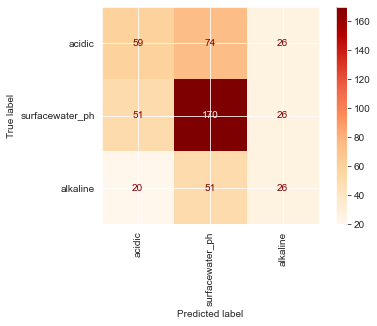

In [99]:
disp = plot_confusion_matrix(final_svc_ph, X_imp_test, Y_test, 
                             display_labels=['acidic','surfacewater_ph','alkaline'], 
                             cmap="OrRd", xticks_rotation='vertical')

# Model Interpretation with SHAP - Predicting Water pH Categories

In [100]:
# original values will be used for model interpretation
# to see actual values and not encoded values on the graphs
var_phcategories = ['hardness','solids','chloramines','sulfate']
X_train_disp, X_test_disp, Y_train_disp, Y_test_disp = train_test_split(X[var_phcategories], Y, test_size=0.25, random_state=42)

In [101]:
explainer = shap.KernelExplainer(final_svc_ph.predict_proba,data=X_imp_train)
# finding out the shap values using the explainer
sub_dataset = shap.sample(X_imp_test, 20)
shap_values = explainer.shap_values(sub_dataset)

Using 1508 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/20 [00:00<?, ?it/s]

The base value is the value that would be predicted if we didn’t know any features for the current instance. The base value is the average of the model output over the training dataset (`explainer.expected_value` in the code). In this case, the base value is 0.35, 0.47 and 0.17 for acidic level, normal surface water pH value, and alkaline level. 

In [102]:
# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output
print('Expected Value:', explainer.expected_value)

Expected Value: [0.35487717 0.47302283 0.1721    ]


In [103]:
print(type(shap_values))
print(type(shap_values[0])) 
print(len(shap_values)) # number of classes in the target column

<class 'list'>
<class 'numpy.ndarray'>
3


We can think of each array of SHAP values in the way that each array is assessing each class as its own binary target. In this case, acidic level (1) vs. not acidic level (0), normal pH_surface water (1) vs. not normal pH_surface water (0), and alkaline level (1) vs. not alkaline level (0).
<br><br>
To visualize individual model predictions, we can use **force plot** & **waterfall** from the shap package. 
* The numbers on the plot arrows are the value of the feature for the particular instance. 
* Red features pushed the model score higher, while the blue features that pushed the score lower.
* The bigger the size of arrow, the bigger the impact of the feature on the output. 

In [124]:
Y_test_disp.iloc[7]

'alkaline level'

In [126]:
# force plot for 7th water sample in the test set
shap.initjs()
shap.force_plot(explainer.expected_value[2], 
                shap_values[2][7], 
                X_test_disp.iloc[7,:], 
                feature_names = var_phcategories)

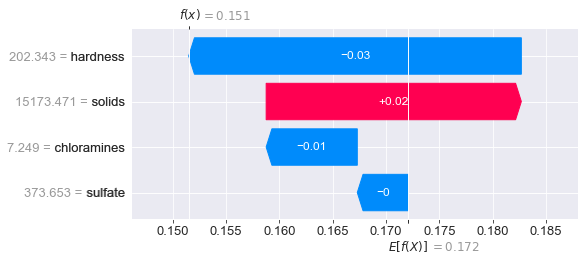

In [128]:
# waterfall for 7th water sample in the test set
shap.initjs()
shap.waterfall_plot(shap.Explanation(base_values=explainer.expected_value[2], 
                                     values=shap_values[2][7], 
                                     data=X_test_disp.iloc[7,:],  
                                     feature_names=var_phcategories))

The visualization above showed the force plot & waterplot for 7th water sample in the test set, and its actual categpry is alkaline. 

* The model's `predict_proba` value: 0.151
* The base value for alkaline class: 0.1721
* Based on the sizes of blue arrows, hardness lowers the property value with the greatest impact, followed by chloramines and then sulfate.  
* Solids is the only feature that increases the property value in this case. 

In [113]:
Y_test_disp.iloc[8]

'acidic level'

In [114]:
# force plot for 8th water sample in the test set
shap.initjs()
shap.force_plot(explainer.expected_value[0], 
                shap_values[0][8], 
                X_test_disp.iloc[8,:], 
                feature_names = var_phcategories)

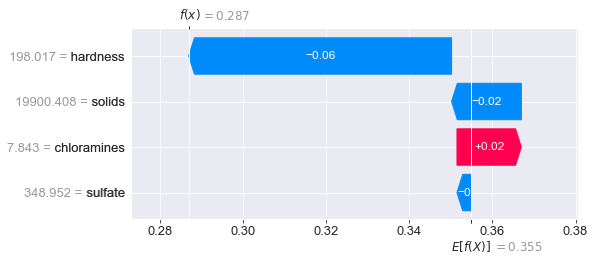

In [129]:
# waterfall for 8th water sample in the test set
shap.initjs()
shap.waterfall_plot(shap.Explanation(base_values=explainer.expected_value[0], 
                                     values=shap_values[0][8], 
                                     data=X_test_disp.iloc[8,:],  
                                     feature_names=var_phcategories))

The visualization above showed the force plot & waterplot for 8th water sample in the test set, and its actual categpry is acidic. 

* The model's `predict_proba` value: 0.287 
* The base value for acidic class: 0.3549 
* Based on the sizes of blue arrows, hardness lowers the property value with the greatest impact, followed by solids and then sulfate.
* Chloramines is the only feature that increases the property value in this case. 

To show what the machine managed to learn from the features, we can use **summary plot** as below. 

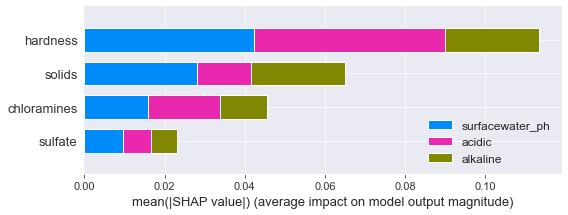

In [141]:
shap.initjs()
shap.summary_plot(shap_values, 
                  X_test_disp,
                  feature_names=var_phcategories,
                  class_names=['acidic','surfacewater_ph','alkaline'])

In the overall analysis of water pH categories, hardness feature has the highest importance, followed by solids, chloramines and sulfate. This result is consistent with result Boruta we obtained previously. Besides, we can also see that level of importance of each feature to a particular class (based on the size & color of the bars). 
* In determining the normal surface water pH category, hardness posses the highest importance, followed by solids, chloramines and sulfate. 
* In determining the acidic category, hardness posses the highest importance, followed by chloramines, solids, and sulfate.  
* In determining the alkaline category, solids posses the highest importance, followed by hardness, chloramines, and sulfate. It might not be clearly shoen by the stacked summary plot above, but we can actually plot a summary plot particularly for alkaline class as shown below. From the summary plot for alkaline class below, we can clearly see that solids feature has higher importance than hardness. 

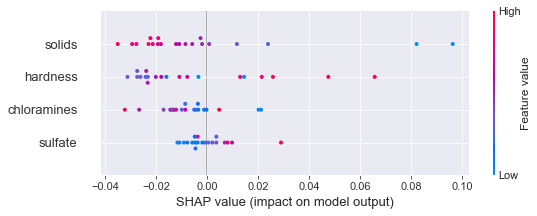

In [147]:
shap.summary_plot(shap_values[2], sub_dataset, feature_names=var_phcategories)

A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model. 
* Each dot is a single prediction (row) from the dataset.
* The x-axis is the actual value from the dataset.
* The y-axis is the SHAP value for that feature, which represents how much knowing that feature’s value changes the output of the model for that sample’s prediction.

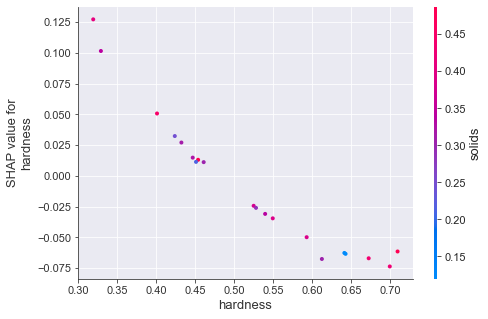

In [149]:
shap.dependence_plot(0, shap_values[0], sub_dataset, feature_names=var_phcategories)

From the dependence plot above, the relationship between hardness and solids is represented by a curve, whereby high level of hardness is accomapanied by a low level of solids and a low SHAP value.

# Recommendation

* There is many other algorithms that could be tried out with this dataset, such as CatBoost Classifier and Light Gradient Boosting Machine. 
* Tune the 5 selected individual models with different hyperparameters. 